***Import dataset from Keras inbuilt datasets***

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import  mnist
(train_img, train_lbl),(test_img, test_lbl) = mnist.load_data()

***Visualising the Input datas***

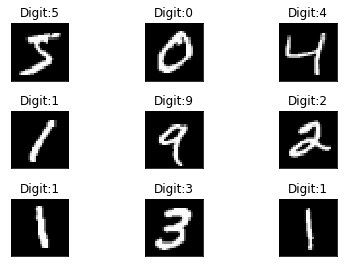

In [24]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_img[i], cmap='gray', interpolation='none')
  plt.title(f'Digit:{train_lbl[i]}')
  plt.tick_params(axis='x',bottom=False, labelbottom=False)
  plt.tick_params(axis='y',left=False, labelleft=False)

Text(0.5, 1.0, 'Pixel Value Distribution')

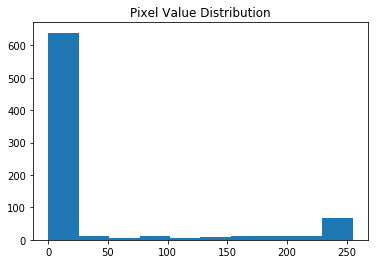

In [25]:
fig = plt.figure()
plt.hist(train_img[0].reshape(784)) 
plt.title('Pixel Value Distribution')

In [26]:
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


***building the input vector from the 28x28 pixels***

In [0]:
train_img = train_img.reshape(60000,28*28)
train_img = train_img.astype('float32')
test_img = test_img.reshape(10000,28*28)
test_img = test_img.astype('float32')

***normalizing the data to help with the training***

In [0]:
train_img /= 255
test_img /=255

In [29]:
print(train_img.shape)
print(test_img.shape)

(60000, 784)
(10000, 784)


In [30]:
print(np.unique(train_lbl, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [31]:
from keras.utils import np_utils
train_lbl = np_utils.to_categorical(train_lbl, 10)
test_lbl = np_utils.to_categorical(test_lbl, 10)
print(train_lbl.shape)
print(test_lbl.shape)

(60000, 10)
(10000, 10)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()

In [0]:
classifier.add(Dense(units=397, kernel_initializer='uniform', activation='relu', input_dim=784))
classifier.add(Dense(units=397, kernel_initializer='uniform', activation='relu'))

In [0]:
classifier.add(Dense(units=10,kernel_initializer='uniform',activation='softmax'))

In [0]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
hist = classifier.fit(train_img,train_lbl,batch_size=200,epochs=20, validation_data=(test_img, test_lbl))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.0545 - acc: 0.9814 - val_loss: 0.0259 - val_acc: 0.9914
Epoch 2/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0206 - acc: 0.9932 - val_loss: 0.0173 - val_acc: 0.9940
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0138 - acc: 0.9953 - val_loss: 0.0132 - val_acc: 0.9956
Epoch 4/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0099 - acc: 0.9967 - val_loss: 0.0134 - val_acc: 0.9952
Epoch 5/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0072 - acc: 0.9976 - val_loss: 0.0130 - val_acc: 0.9956
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0056 - acc: 0.9981 - val_loss: 0.0132 - val_acc: 0.9957
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - los

In [0]:
# predictions = classifier.predict(X_test)
# predictions = predictions>0.5

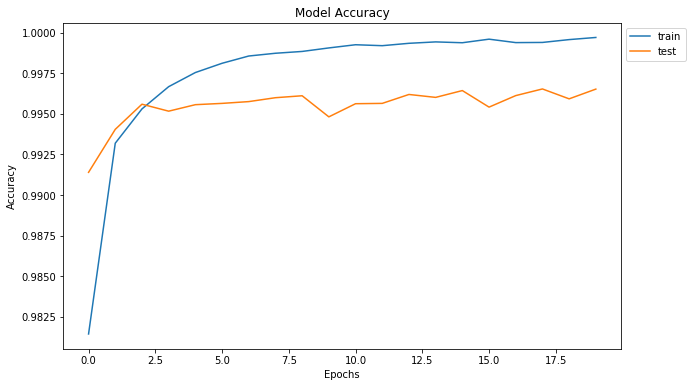

In [36]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'],bbox_to_anchor=(1,1))

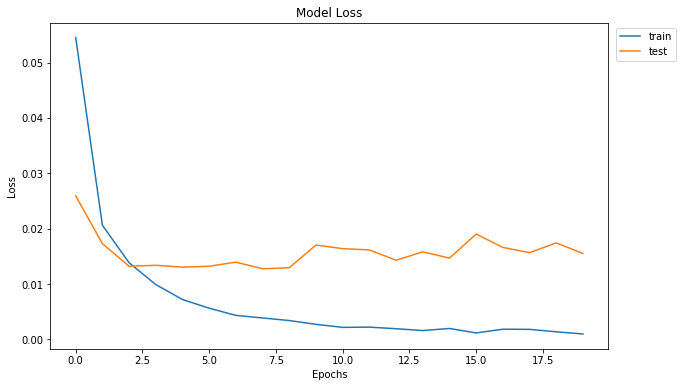

In [19]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'],bbox_to_anchor=(1.13,1))

In [20]:
classifier.evaluate(test_img, test_lbl) 

10000/10000 [==============================] - 1s 54us/step


[0.015516621472065253, 0.9965299962997437]

In [0]:
pred_class = classifier.predict_classes(test_img)
test_lbl = mnist.load_data()[1][1]

In [38]:
print(f'Classified correctly: {sum(pred_class == test_lbl)}')
print(f'Classified incorrectly: {sum(pred_class != test_lbl)}')

Classified correctly: 904
Classified incorrectly: 9096
